# Textual Analysis: Part 2
Introduction to Digital History 3/28/22

In [10]:
#!pip install pandas
#!pip install openpyxl
#!pip install nltk
#!pip install tomotopy
#!pip install little_mallet_wrapper
#!pip install seaborn

## LOAD UHQ Data

In [1]:
import pandas as pd

#Load UHQ data into a pandas dataframe
df = pd.read_excel("UHQ_FULL_EDITED.xlsx")
df

,titles,document_type,author,gender,editor,translator,journal,volume,issue,year,pages,description,article_url,text
0,I Have Shot My Betrayer: The Trial of Amanda O...,NaN,LISA OLSEN TAIT,female,NaN,NaN,Utah Historical Quarterly,89,2,2021,Pages 8-25,NaN,https://issuu.com/utah10/docs/utah_historical_...,"It was Monday evening, September 29, 1890, abo..."
1,How Idealized Womanhood Saved Annie Bradley fr...,NaN,ALLISON EDWARDS,female,NaN,NaN,Utah Historical Quarterly,89,2,2021,Pages 26-37,NaN,https://issuu.com/utah10/docs/utah_historical_...,"On December 8, 1906, the sixty-three-year-old ..."
2,"Mountain Common Law, Redux: The Extralegal Pun...",NaN,KENNETH L. CANNON II,male,NaN,NaN,Utah Historical Quarterly,89,2,2021,Pages 38-55,NaN,https://issuu.com/utah10/docs/utah_historical_...,Violence and extralegal justice were widesprea...
3,Josie Kensler: Murder and Survival in Southern...,NaN,PAULA HUFF BRYANT,female,NaN,NaN,Utah Historical Quarterly,89,2,2021,Pages 56-68,NaN,https://issuu.com/utah10/docs/utah_historical_...,Josephine “Josie” Kensler was a beautiful woma...
4,Organizing Farmers in Utah,NaN,MATTHEW C. GODFREY,male,NaN,NaN,Utah Historical Quarterly,89,1,2021,Pages 33-48,Charles G. Patterson and the Intermountain Ass...,https://issuu.com/utah10/docs/utah_historical_...,"In 1917, Charles G. Patterson, a Utah attorney..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1416,Some Use Early Utah Indian References,NaN,J. CECIL ALTER,male,NaN,NaN,Utah Historical Quarterly,1,1-4,1928,Pages 55-59,"Continued from the January, 1928 issue)",https://issuu.com/utah10/docs/uhq_1928/s/50462,"UHQ Volume 2, Number 2\nApril 1928\nSOME USEFU..."
1417,"Gunnison Massacre-1853-Millard County, Utah-In...",NaN,JOSIAH F. GIBBS,male,NaN,NaN,Utah Historical Quarterly,1,1-4,1928,Pages 70-79,Nearly seventy-five years have passed since th...,https://issuu.com/utah10/docs/uhq_1928/s/50466,"UHQ Volume 1, Number 3\nJuly 1928\nGUNNISON MA..."
1418,Father Escalante and the Utah Indians,NaN,J. CECIL ALTER,male,NaN,NaN,Utah Historical Quarterly,1,1-4,1928,Pages 79-90,"Continuing: ""Some Useful early Utah Indian Ref...",https://issuu.com/utah10/docs/uhq_1928/s/50473,UHQ Volume 1 Number 3\nJune 1928\nFATHER ESCAL...
1419,Personal Recollections of Wash-A-Kie: Chief of...,NaN,P.L. WILLIAMS,male,NaN,NaN,Utah Historical Quarterly,1,1-4,1928,Pages 105-111,"Prefatory to noting these ""recollections"" it w...",https://issuu.com/utah10/docs/uhq_1928/s/50476,"UHQ Volume 1 October, 1928 Number 4\nPERSONAL ..."


### Wordclouds

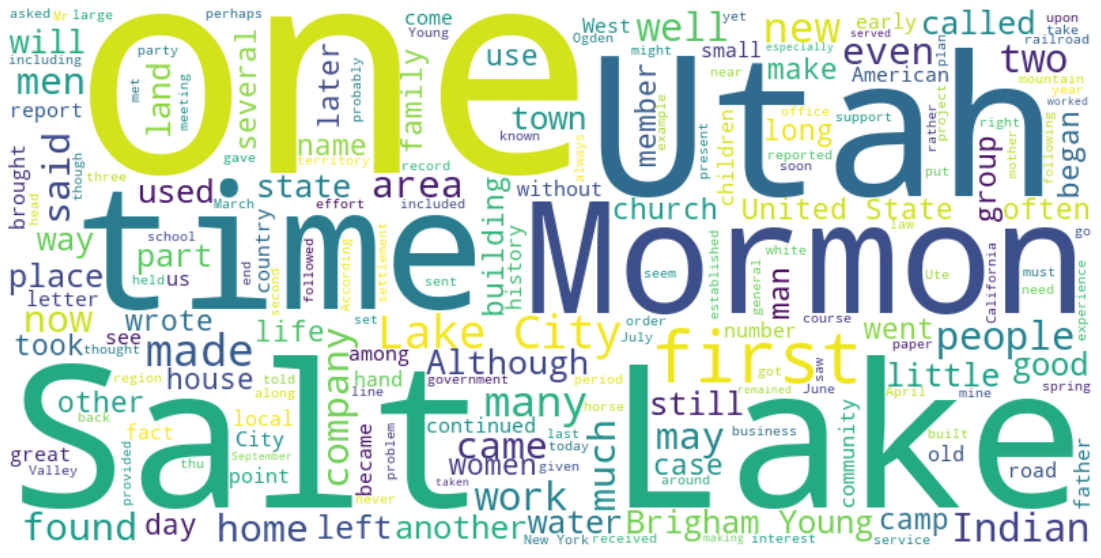

In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#creating string containing all UHQ texts
df2 = df[df['text'].notna()].reset_index()

word_cloud2 = WordCloud(background_color = 'white',
                       width=800, 
                       height=400).generate(' '.join([str(elem) for elem in df2.text.tolist()]))

plt.figure(figsize=(20,10))
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

### Count length of UHQ issues

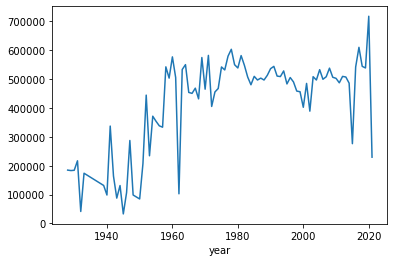

In [3]:
df['text_length'] = df['text'].str.len()
output = df.groupby(['year']).sum()
output['text_length'].plot()

### Trace word counts overtime

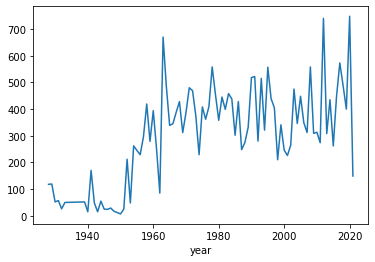

In [6]:
word = "Utah"

df['word_count'] = df.text.str.count(word)
output = df.groupby(['year']).sum()
output['word_count'].plot()

## Gender Composition -- Who Writes Utah History?

Gender data compiled by using Lincoln Mullen (2018). gender: Predict Gender from Names Using Historical Data. R package version 0.5.2. See https://lincolnmullen.com/software/gender/

In [7]:
df2 = df[df['gender'].notna()]
gender_list = df2['gender'].tolist()
year_list = df2['year'].tolist()

full_gender_list = []
full_year_list = []

for g, y in zip(gender_list, year_list):
    temp_g = g.split(';')
    for t in temp_g:
        full_gender_list.append(t.strip())
        full_year_list.append(y)

In [8]:
len(full_gender_list), len(full_year_list)

(1515, 1515)

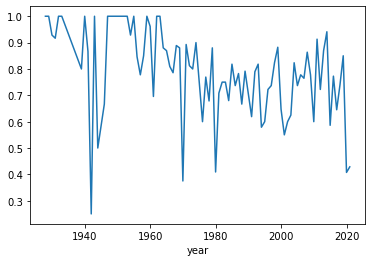

In [9]:
gender_df = pd.DataFrame()
gender_df['year'] = full_year_list
gender_df['gender'] = full_gender_list
output = gender_df[gender_df['gender'] == 'male'].groupby(['year']).count() / gender_df.groupby(['year']).count()
output['gender'].plot()

In [10]:
output[output['gender'] < 0.5]

,gender
year,
1942,0.250000
1970,0.375000
1980,0.409091
2020,0.407407
2021,0.428571


## Historical Time -- When is Utah History? 

In [11]:
import re

df2 = df[df['text'].notna()].reset_index()
texts = df2.text.tolist()
years = df2.year.tolist()
titles = df2.titles.tolist()
print(len(texts), len(years), len(titles))

dates = []
pub_dates = []
pub_titles = []
skips = [".", ",", ":", ";", "'", '"', '“', '”', '(', ')', '’'] 

for te, y, ti in zip(texts, years, titles):
    for ch in skips:
        te = te.replace(ch, "")
        
    for word in te.split(' '):
        if re.match(r'([1-2][0-9]{3}$)', word):
            if int(word) > 1000 and int(word) <= 2022:
                dates.append(int(word))
                pub_dates.append(y)
                pub_titles.append(ti)

print(len(dates), len(pub_dates), len(pub_titles))

1412 1412 1412
41076 41076 41076


In [13]:
year_df = pd.DataFrame()
year_df['titles'] = pub_titles
year_df['pub_dates'] = pub_dates
year_df['dates'] = dates
year_df

,titles,pub_dates,dates
0,I Have Shot My Betrayer: The Trial of Amanda O...,2021,1890
1,I Have Shot My Betrayer: The Trial of Amanda O...,2021,1890
2,I Have Shot My Betrayer: The Trial of Amanda O...,2021,1850
3,I Have Shot My Betrayer: The Trial of Amanda O...,2021,1871
4,I Have Shot My Betrayer: The Trial of Amanda O...,2021,1885
...,...,...,...
41071,Personal Recollections of Wash-A-Kie: Chief of...,1928,1872
41072,Personal Recollections of Wash-A-Kie: Chief of...,1928,1886
41073,Personal Recollections of Wash-A-Kie: Chief of...,1928,1887
41074,Personal Recollections of Wash-A-Kie: Chief of...,1928,1862


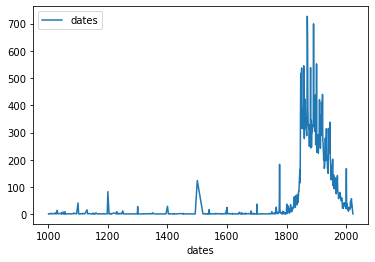

In [14]:
output = year_df.groupby(['dates'])[['dates']].count()
output.plot()

In [26]:
year_df[year_df.dates == 1847].count()

titles       517
pub_dates    517
dates        517
dtype: int64

# Concordance and Collocation

In [27]:
#find word associations
from nltk import Text, tokenize
import nltk
nltk.download("punkt")

sample_text = df.text[0]

uhq_tokens = tokenize.word_tokenize(sample_text) #tokenize
uhq = Text(uhq_tokens)

word = "Utah"
uhq.concordance(word, lines=10) #concordance

[nltk_data] Downloading package punkt to /Users/Spencer/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Displaying 7 of 7 matches:
 woman had been tried in territorial Utah for capital murder . It featured a c
Cleveland as an associate justice of Utah and as judge of the First District ,
Washington , Powers took his seat in Utah just a few weeks later , and almost 
i-polygamy crusade and other complex Utah cases , including the Bullion-Beck m
nomination and stepped down from the Utah bench in August of that year . While
owers built an extensive practice in Utah and the West . He was in demand nati
 the murder of Arthur Brown , one of Utah ’ s first senators . The Bradley cas


In [28]:
uhq.similar(word, 10) #collocation

c hart his olson characters sex hand man seduction health


## Word Embedding

In [29]:
#word2vec
from gensim.models import word2vec
from nltk import Text, tokenize
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.corpus import stopwords
import string
import nltk
nltk.download("stopwords")

#Create a function that will produce a word2vec model
def word_2_vec_model(text):
    print("Tokenizing by sentence")

    sent_full = []
    
    stop = set(stopwords.words('english') + list(string.punctuation) + [".", ", ", ":", ";", "'", '"', '``',"''", '’', '“', '”'])
    
    sent = tokenize.sent_tokenize(text)
    
    for s in sent:
        word_tokens = word_tokenize(s.lower())
        filtered = []
        for w in word_tokens:
            if w not in stop:
                filtered.append(w)
        sent_full.append(filtered)
        
    print("Creating word2vec model")
    model = word2vec.Word2Vec(
        sent_full,
        vector_size=150,
        window=10,
        min_count=2,
        workers=10,
        epochs=10)
    
    return model

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Spencer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
year_begin = 1930 #UHQ first year is 1928
year_end = 1940 #UHQ end year is 2021

#creating string containing all UHQ texts
df2 = df[(df['text'].notna()) & (df['year'] >= year_begin) & (df['year'] <= year_end)].reset_index()

full_uhq_texts = ' '.join([str(elem) for elem in df2.text.tolist()])

full_model = word_2_vec_model(full_uhq_texts)

Tokenizing by sentence
Creating word2vec model


In [31]:
full_model.wv.index_to_key[:20]

['river',
 'one',
 'miles',
 'indians',
 "'s",
 'day',
 'two',
 'would',
 'time',
 'came',
 'valley',
 'men',
 'water',
 'camp',
 'made',
 'utah',
 'us',
 'could',
 'shall',
 'found']

In [42]:
word = "mormon"
full_model.wv.most_similar(word, topn=20)

[('mormons', 0.999690592288971),
 ('lands', 0.9996626973152161),
 ('social', 0.9996310472488403),
 ('published', 0.9996305108070374),
 ('history', 0.9995962977409363),
 ('interest', 0.9995194673538208),
 ('organization', 0.9995150566101074),
 ('life', 0.9995093941688538),
 ('washington', 0.9995061755180359),
 ('case', 0.9994988441467285),
 ('utes', 0.9994970560073853),
 ('sold', 0.9994878172874451),
 ('mrs.', 0.9994813203811646),
 ('part', 0.999480128288269),
 ('later', 0.999479353427887),
 ('silver', 0.9994763135910034),
 ('respect', 0.9994757771492004),
 ('year', 0.9994658827781677),
 ('pioneer', 0.9994577169418335),
 ('jones', 0.9994550347328186)]

# TOPIC MODELING


### Topic Modeling at the Document Level

Topic modeling at the document and paragraph levels are both deriving one single topic of a given tocument. 

In [43]:
import tomotopy as tp
import little_mallet_wrapper
import seaborn
import glob
from pathlib import Path

In [44]:
year_begin = 1928 #UHQ first year is 1928
year_end = 2021 #UHQ end year is 2021

#creating string containing all UHQ texts
topic_model_df = df[(df['text'].notna()) & (df['year'] >= year_begin) & (df['year'] <= year_end)].reset_index()

In [45]:
texts = topic_model_df.text.tolist()
titles = topic_model_df.titles.tolist()

training_data = []
for t in texts:
    processed_text = little_mallet_wrapper.process_string(t, numbers='remove')
    training_data.append(processed_text)

little_mallet_wrapper.print_dataset_stats(training_data)

Number of Documents: 1412
Mean Number of Words per Document: 2363.5
Vocabulary Size: 69956


In [46]:
len(training_data), len(texts), len(titles), len(topic_model_df)

(1412, 1412, 1412, 1412)

In [47]:
# Number of topics to return
num_topics = 30
# Numer of topic words to print out
num_topic_words = 10

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())
    
print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')

print("\nTopic Model Results:\n\n")
# Print out top 10 words for each topic
topics = []
topic_individual_words = []
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"✨Topic {topic_number}✨\n\n{topic_words}\n")

Topic Model Training...


Iteration: 0	Log-likelihood: -10.38316670929325
Iteration: 10	Log-likelihood: -9.82692218266604
Iteration: 20	Log-likelihood: -9.659462334821466
Iteration: 30	Log-likelihood: -9.579233016904801
Iteration: 40	Log-likelihood: -9.530937414041965
Iteration: 50	Log-likelihood: -9.49523774083811
Iteration: 60	Log-likelihood: -9.466547849395566
Iteration: 70	Log-likelihood: -9.442589534365105
Iteration: 80	Log-likelihood: -9.422114675029478
Iteration: 90	Log-likelihood: -9.405879879198595

Topic Model Results:


✨Topic 0✨

wrote one published even book mormon may paper letter letters

✨Topic 1✨

mining mine coal miners mines company county silver greek ore

✨Topic 2✨

state would new national building service utah local public construction

✨Topic 3✨

women utah american community woman work many also century one

✨Topic 4✨

lake salt city utah first deseret new news young west

✨Topic 5✨

canyon park road monument area cedar national brown highway southern

✨Topic 6

## Examine Top Documents and Titles

Load topic distributions

In [48]:
topic_distributions = [list(doc.get_topic_dist()) for doc in model.docs]

Make functions for displaying top documents. The get_top_docs() function is taken from Maria Antoniak’s Little Mallet Wrapper

In [49]:
from IPython.display import Markdown, display
import re

def make_md(string):
    display(Markdown(str(string)))

def get_top_docs(docs, topic_distributions, topic_index, n=5):
    
    sorted_data = sorted([(_distribution[topic_index], _document) 
                          for _distribution, _document 
                          in zip(topic_distributions, docs)], reverse=True)
    
    topic_words = topics[topic_index]
    
    make_md(f"### ✨Topic {topic_index}✨\n\n{topic_words}\n\n---")
    
    for probability, doc in sorted_data[:n]:
        # Make topic words bolded
        for word in topic_words.split():
            if word in doc.lower():
                doc = re.sub(f"\\b{word}\\b", f"**{word}**", doc, re.IGNORECASE)
        
        make_md(f'✨  \n**Topic Probability**: {probability}  \n**Document**: {doc}\n\n')
    
    return

In [52]:
get_top_docs(titles, topic_distributions, topic_index=0, n=6)

### ✨Topic 0✨

wrote one published even book mormon may paper letter letters

---

✨  
**Topic Probability**: 0.3921988904476166  
**Document**: Searching for Abner Blackburn



✨  
**Topic Probability**: 0.3838331401348114  
**Document**: Applause, Attack, and Ambivalence - Varied Responses to Fawn M. Brodie's No Man Knows My History



✨  
**Topic Probability**: 0.3308258354663849  
**Document**: Isaac Russell’s Remarkable Interview with Harold Bride, Sole Surviving Wireless Operator from the Titanic



✨  
**Topic Probability**: 0.3281087577342987  
**Document**: The Salt Lake City Beobachter: Mirror of an Immigration



✨  
**Topic Probability**: 0.3245486915111542  
**Document**: The Salt Lake City Beobachter: Mirror of an Immigration



✨  
**Topic Probability**: 0.31390613317489624  
**Document**: Charles Mackay and His "True and Impartial History" of the Mormons



In [53]:
import pandas as pd
import numpy as np

topic_results = []
for topic_distribution in topic_distributions:
    topic_results.append({'topic_distribution': topic_distribution})

topics_df = pd.DataFrame(topic_results)
column_names = [f"Topic {number} {' '.join(topic[:4])}" for number, topic in enumerate(topic_individual_words)]
topics_df[column_names] = pd.DataFrame(topics_df['topic_distribution'].tolist(), index = topics_df.index)
topics_df = topics_df.drop('topic_distribution', axis='columns')
topics_df['Dominant_topic'] = (np.argmax(topics_df.values, axis=1))
topics_df


,Topic 0 wrote one published even,Topic 1 mining mine coal miners,Topic 2 state would new national,Topic 3 women utah american community,Topic 4 lake salt city utah,Topic 5 canyon park road monument,Topic 6 john family young two,Topic 7 law court case judge,Topic 8 lake train island would,Topic 9 river canyon colorado powell,...,Topic 21 home town years old,Topic 22 railroad ogden pacific union,Topic 23 utah mormon would territory,Topic 24 city club street music,Topic 25 fire man home death,Topic 26 history utah university historical,Topic 27 river miles valley road,Topic 28 company utah per sugar,Topic 29 mormon church young mormons,Dominant_topic
0,0.150867,0.000045,0.000835,0.035067,0.045721,0.007612,0.016906,0.223051,0.003840,0.000052,...,0.014826,0.001429,0.108483,0.105200,0.070650,0.001826,0.000479,0.001499,0.001148,7
1,0.105540,0.000045,0.004641,0.125868,0.051988,0.143770,0.013253,0.198035,0.000419,0.000052,...,0.000102,0.000060,0.121855,0.005248,0.028429,0.000460,0.000483,0.005657,0.000121,7
2,0.080560,0.001058,0.000485,0.015332,0.079872,0.000077,0.056860,0.419551,0.000072,0.000051,...,0.002126,0.000734,0.160677,0.000403,0.025769,0.000112,0.002161,0.000803,0.037267,7
3,0.016613,0.000990,0.003616,0.090860,0.005535,0.015879,0.093696,0.118976,0.155611,0.003842,...,0.045302,0.007642,0.027435,0.007016,0.136987,0.002318,0.013088,0.000435,0.000111,8
4,0.037935,0.000045,0.023485,0.043032,0.003263,0.001107,0.000470,0.022076,0.000073,0.000052,...,0.000101,0.000746,0.148856,0.000066,0.000104,0.002173,0.000137,0.450012,0.052281,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407,0.063346,0.000153,0.006315,0.000463,0.002914,0.000263,0.016686,0.001546,0.000246,0.022241,...,0.000341,0.003685,0.018327,0.000225,0.007321,0.001546,0.146789,0.001600,0.000408,20
1408,0.045917,0.001832,0.001968,0.008159,0.036144,0.041784,0.014797,0.028527,0.016945,0.028891,...,0.008999,0.003181,0.019414,0.000086,0.035610,0.010790,0.252494,0.004158,0.000599,27
1409,0.004315,0.000054,0.000588,0.003027,0.000617,0.019323,0.027564,0.004636,0.000496,0.001289,...,0.001348,0.000071,0.033052,0.000079,0.004216,0.000954,0.287795,0.001382,0.006690,27
1410,0.005147,0.002462,0.027071,0.004244,0.060930,0.017472,0.023086,0.030918,0.000167,0.007980,...,0.003376,0.001709,0.139754,0.016660,0.004955,0.000261,0.122160,0.000297,0.016785,13


In [54]:
len(topic_model_df), len(topics_df)

(1412, 1412)

In [55]:
full_topics_model_df = pd.merge(topic_model_df, topics_df, left_index = True, right_index = True)
full_topics_model_df

,index,titles,document_type,author,gender,editor,translator,journal,volume,issue,...,Topic 21 home town years old,Topic 22 railroad ogden pacific union,Topic 23 utah mormon would territory,Topic 24 city club street music,Topic 25 fire man home death,Topic 26 history utah university historical,Topic 27 river miles valley road,Topic 28 company utah per sugar,Topic 29 mormon church young mormons,Dominant_topic
0,0,I Have Shot My Betrayer: The Trial of Amanda O...,NaN,LISA OLSEN TAIT,female,NaN,NaN,Utah Historical Quarterly,89,2,...,0.014826,0.001429,0.108483,0.105200,0.070650,0.001826,0.000479,0.001499,0.001148,7
1,1,How Idealized Womanhood Saved Annie Bradley fr...,NaN,ALLISON EDWARDS,female,NaN,NaN,Utah Historical Quarterly,89,2,...,0.000102,0.000060,0.121855,0.005248,0.028429,0.000460,0.000483,0.005657,0.000121,7
2,2,"Mountain Common Law, Redux: The Extralegal Pun...",NaN,KENNETH L. CANNON II,male,NaN,NaN,Utah Historical Quarterly,89,2,...,0.002126,0.000734,0.160677,0.000403,0.025769,0.000112,0.002161,0.000803,0.037267,7
3,3,Josie Kensler: Murder and Survival in Southern...,NaN,PAULA HUFF BRYANT,female,NaN,NaN,Utah Historical Quarterly,89,2,...,0.045302,0.007642,0.027435,0.007016,0.136987,0.002318,0.013088,0.000435,0.000111,8
4,4,Organizing Farmers in Utah,NaN,MATTHEW C. GODFREY,male,NaN,NaN,Utah Historical Quarterly,89,1,...,0.000101,0.000746,0.148856,0.000066,0.000104,0.002173,0.000137,0.450012,0.052281,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407,1416,Some Use Early Utah Indian References,NaN,J. CECIL ALTER,male,NaN,NaN,Utah Historical Quarterly,1,1-4,...,0.000341,0.003685,0.018327,0.000225,0.007321,0.001546,0.146789,0.001600,0.000408,20
1408,1417,"Gunnison Massacre-1853-Millard County, Utah-In...",NaN,JOSIAH F. GIBBS,male,NaN,NaN,Utah Historical Quarterly,1,1-4,...,0.008999,0.003181,0.019414,0.000086,0.035610,0.010790,0.252494,0.004158,0.000599,27
1409,1418,Father Escalante and the Utah Indians,NaN,J. CECIL ALTER,male,NaN,NaN,Utah Historical Quarterly,1,1-4,...,0.001348,0.000071,0.033052,0.000079,0.004216,0.000954,0.287795,0.001382,0.006690,27
1410,1419,Personal Recollections of Wash-A-Kie: Chief of...,NaN,P.L. WILLIAMS,male,NaN,NaN,Utah Historical Quarterly,1,1-4,...,0.003376,0.001709,0.139754,0.016660,0.004955,0.000261,0.122160,0.000297,0.016785,13


In [56]:
full_topics_model_df['Dominant_topic'].value_counts()

11    141
27     98
12     77
23     75
13     66
10     65
14     61
9      59
3      57
26     56
17     56
1      53
28     50
19     46
0      43
22     42
2      42
4      40
29     40
7      37
6      36
18     31
20     28
15     22
16     21
24     21
21     16
5      16
8      11
25      6
Name: Dominant_topic, dtype: int64

In [57]:
topic_number = 21

full_topics_model_df[full_topics_model_df.Dominant_topic == topic_number]

,index,titles,document_type,author,gender,editor,translator,journal,volume,issue,...,Topic 21 home town years old,Topic 22 railroad ogden pacific union,Topic 23 utah mormon would territory,Topic 24 city club street music,Topic 25 fire man home death,Topic 26 history utah university historical,Topic 27 river miles valley road,Topic 28 company utah per sugar,Topic 29 mormon church young mormons,Dominant_topic
184,193,Utah’s Mammoth Statehood Flag,NaN,JOHN M. HARTVIGSEN,male,NaN,NaN,Utah Historical Quarterly,79,3,...,0.261467,0.000085,0.148107,0.007895,0.000148,0.026001,0.010921,0.005547,0.004072,21
298,307,"Willem Jacobus DeBry and De Utah Nederlander, ...",NaN,WILLIAM MULDER,male,NaN,NaN,Utah Historical Quarterly,72,2,...,0.179999,0.003012,0.045560,0.120874,0.017499,0.040488,0.003414,0.015553,0.057238,21
308,317,“Our Tone”: Tony Lazzeri’s Baseball Career in ...,NaN,JOHN SILLITO,male,NaN,NaN,Utah Historical Quarterly,72,4,...,0.315495,0.050138,0.037660,0.181306,0.000113,0.011334,0.000897,0.009109,0.000131,21
311,320,Jennie Anderson Froiseth and the Blue Tea,NaN,PATRICIA LYN SCOTT,female,NaN,NaN,Utah Historical Quarterly,71,1,...,0.174493,0.000397,0.163483,0.036299,0.001457,0.054970,0.000812,0.001821,0.011971,21
326,335,Coming Home: Community Baseball in Cache Valle...,NaN,JESSIE L. EMBRY; ADAM SETH DAROWSKI,female; male,NaN,NaN,Utah Historical Quarterly,70,2,...,0.283969,0.000057,0.015717,0.261568,0.008323,0.011951,0.009342,0.021505,0.008339,21
350,359,It's All Downhill from Here: The Rise and Fall...,NaN,LEE SATHER,male,NaN,NaN,Utah Historical Quarterly,69,4,...,0.204704,0.182529,0.026812,0.138261,0.001361,0.001054,0.001708,0.004547,0.000111,21
351,360,Alf Engen: A Son's Reminiscences,NaN,ALAN K. ENGEN,male,NaN,NaN,Utah Historical Quarterly,69,4,...,0.223940,0.059368,0.007312,0.083821,0.000285,0.055758,0.018231,0.008813,0.001270,21
449,458,Fighting the Good Fight: The Utah Home Front d...,NaN,JESSIE L. EMBRY,female,NaN,NaN,Utah Historical Quarterly,63,3,...,0.162201,0.024073,0.031614,0.026415,0.021115,0.009783,0.000133,0.158560,0.001451,21
454,463,All Hail! Statehood!,NaN,AUDREY M. GODFREY,female,NaN,NaN,Utah Historical Quarterly,63,4,...,0.135700,0.007415,0.071146,0.089890,0.071372,0.018277,0.006217,0.002322,0.008787,21
478,487,"The People's Progressive Telephone Company, 19...",NaN,HELEN B. GARDNER; QUENTON T. BOWLER,female; male,NaN,NaN,Utah Historical Quarterly,61,1,...,0.143173,0.087904,0.034017,0.001184,0.009749,0.000494,0.030540,0.119113,0.000130,21


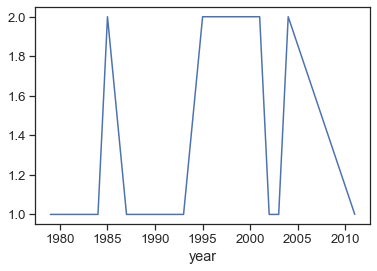

In [58]:
topic_graph = full_topics_model_df[full_topics_model_df.Dominant_topic == topic_number]

output = topic_graph.groupby(['year']).count()
output['Dominant_topic'].plot()

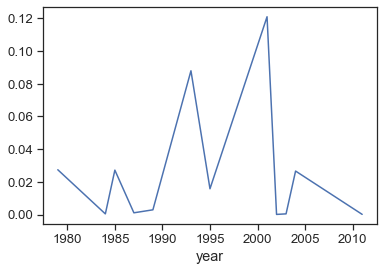

In [59]:
topic_num = "Topic 22 railroad ogden pacific union"
output = topic_graph.groupby(['year']).mean()
output[topic_num].plot()